In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1267019560946451413
]


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
train, test = mnist.load_data()

In [5]:
len(train)

2

In [6]:
type(train[0])

numpy.ndarray

In [7]:
train[0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
train[0].shape

(60000, 28, 28)

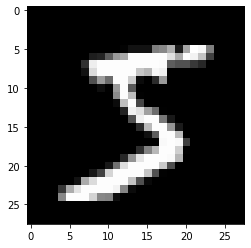

In [9]:
img = train[0][0]
plt.imshow(img, cmap = 'gray')

In [10]:
type(train[1])

numpy.ndarray

In [11]:
train[1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
train[1].shape

(60000,)

In [13]:
x_train = train[0].reshape(60000, 28, 28, 1) / 255
x_test = test[0].reshape(10000, 28, 28, 1) / 255

In [14]:
x_train[0].shape

(28, 28, 1)

In [15]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

In [16]:
t_train = train[1]
t_test = test[1]

In [17]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
t_train, t_test = t_train.astype('int32'), t_test.astype('int32')

In [18]:
import os, random

def reset_seed(seed = 0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [19]:
from tensorflow.keras import models, layers

reset_seed(0)

model = models.Sequential([
    layers.Conv2D(filters = 3, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 507)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               50800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 51,840
Trainable params: 51,840
Non-trainable params: 0
_________________________________________________________________


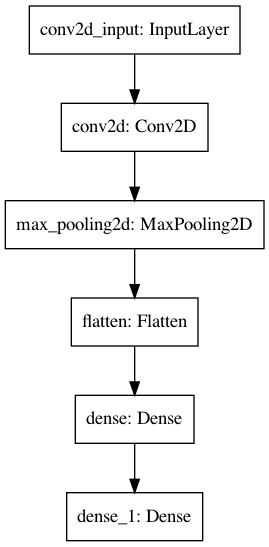

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [22]:
optimizer = tf.keras.optimizers.Adam(lr = 0.01)
model.compile(optimizer = optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [23]:
batch_size = 4096
epochs = 30

history = model.fit(x_train, t_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test, t_test))

Epoch 1/30
15/15 [==============================] - 2s 133ms/step - loss: 1.3839 - accuracy: 0.5829 - val_loss: 0.3955 - val_accuracy: 0.8911
Epoch 2/30
15/15 [==============================] - 2s 125ms/step - loss: 0.3555 - accuracy: 0.8972 - val_loss: 0.2814 - val_accuracy: 0.9165
Epoch 3/30
15/15 [==============================] - 2s 127ms/step - loss: 0.2666 - accuracy: 0.9209 - val_loss: 0.2084 - val_accuracy: 0.9360
Epoch 4/30
15/15 [==============================] - 2s 130ms/step - loss: 0.2060 - accuracy: 0.9396 - val_loss: 0.1792 - val_accuracy: 0.9435
Epoch 5/30
15/15 [==============================] - 2s 125ms/step - loss: 0.1660 - accuracy: 0.9501 - val_loss: 0.1536 - val_accuracy: 0.9530
Epoch 6/30
15/15 [==============================] - 2s 122ms/step - loss: 0.1419 - accuracy: 0.9574 - val_loss: 0.1282 - val_accuracy: 0.9609
Epoch 7/30
15/15 [==============================] - 2s 124ms/step - loss: 0.1227 - accuracy: 0.9634 - val_loss: 0.1176 - val_accuracy: 0.9648
Epoch 

In [25]:
results = pd.DataFrame(history.history)
results.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.026912,0.991833,0.073404,0.9782
26,0.026911,0.991667,0.069251,0.9807
27,0.023256,0.992700,0.069132,0.9803
28,0.023751,0.992500,0.076116,0.9780
29,0.025710,0.991833,0.069727,0.9807


Text(0.5, 0, 'epochs')

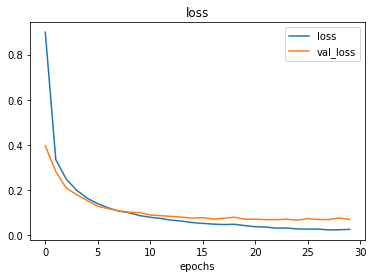

In [26]:
results[['loss', 'val_loss']].plot(title = 'loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

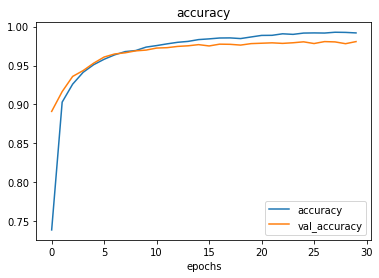

In [27]:
results[['accuracy', 'val_accuracy']].plot(title = 'accuracy')
plt.xlabel('epochs')

In [28]:
x_sample = np.array([x_train[0]])
x_sample.shape

(1, 28, 28, 1)

In [29]:
model.layers

In [30]:
model.layers[0].get_weights()

[array([[[[-0.83995336, -0.7852355 ,  0.34423134]],
 
         [[ 0.31213436, -0.31003937,  0.55768806]],
 
         [[ 0.5103967 ,  0.58898723,  0.25617254]]],
 
 
        [[[-0.88773453, -0.33423597,  0.36585355]],
 
         [[-0.13609526,  0.08106028,  0.2621857 ]],
 
         [[ 0.6569136 ,  0.62182975,  0.28951514]]],
 
 
        [[[-0.14588936, -0.25060984, -0.3279086 ]],
 
         [[-0.82551956,  0.54177654,  0.29298815]],
 
         [[ 0.3777653 ,  0.0728058 ,  0.39697555]]]], dtype=float32),
 array([ 0.08566517,  0.00383966, -0.01436156], dtype=float32)]

In [31]:
output = model.layers[0](x_sample)
output = output[0].numpy()

In [32]:
output.shape

(26, 26, 3)

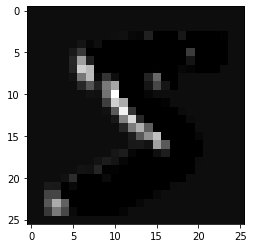

In [33]:
plt.imshow(output[:, :, 0], cmap = 'gray')

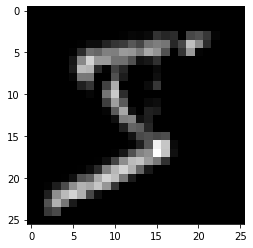

In [34]:
plt.imshow(output[:, :, 1], cmap = 'gray')

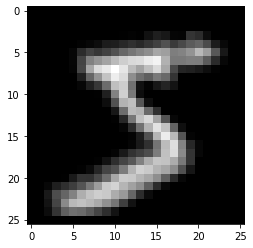

In [35]:
plt.imshow(output[:, :, 2], cmap = 'gray')

In [46]:
output = model.layers[0](x_sample)
output = model.layers[1](output)
output = output[0].numpy()

In [47]:
output.shape

(13, 13, 3)

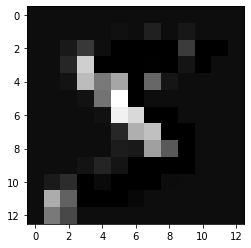

In [48]:
plt.imshow(output[:, :, 0], cmap = 'gray')

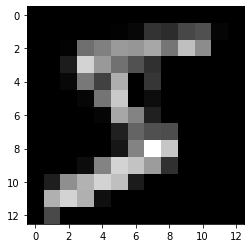

In [49]:
plt.imshow(output[:, :, 1], cmap = 'gray')

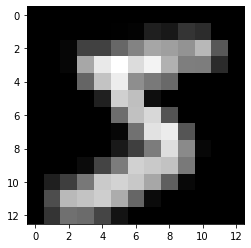

In [50]:
plt.imshow(output[:, :, 2], cmap = 'gray')

In [51]:
output = model.layers[0](x_sample)
output = model.layers[1](output)
output = model.layers[2](output)
output = output[0].numpy()

In [52]:
output.shape

(507,)